In [1]:
from PyMouSh import MoulinShape, TimeStamps, Qin_sinusoidal, Qin_real
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

secinday = 24*3600
ZERO_KELVIN = 273.15
timestep = 300
supraglacial_baseflow = 0.01

def Fill_dict(Q_csv_name,head_csv_name,timestep):
    dictionnary = defaultdict(list)
    
    tmp1 = pd.read_csv(Q_csv_name)
    tmp1 = tmp1.dropna()
    Qin = tmp1.Qm3s.to_numpy() + supraglacial_baseflow
    Qtime = tmp1.SOY.to_numpy()
        
    #time array in seconds
    dictionnary['time'] = TimeStamps(Qtime[0],Qtime[-1],timestep)
    dictionnary['meltwater_input'] = Qin_real(dictionnary['time'], Qin, Qtime)
    
    tmp2 = pd.read_csv(head_csv_name)
    tmp2 = tmp2.dropna()
    dictionnary['h_real'] = tmp2.head_bed.to_numpy()
    dictionnary['t_real'] = tmp2.soy.to_numpy()
    return dictionnary


#temperature profile -- same for all
tmp = pd.read_csv('Field_Data/temperature_foxx1.csv')
temperature_profile = tmp.temperature.to_numpy() #np.array([ZERO_KELVIN, ZERO_KELVIN])#

#field data dictionnaries
tmp = pd.read_csv('Field_Data/surface_discharge_andrews2014_6h.csv')
tmp = tmp.dropna()
m3 = defaultdict(list)
m4 = defaultdict(list)
foxx = defaultdict(list)

Qin = tmp.m3_m3s_6h.to_numpy() + supraglacial_baseflow
Qtime = tmp.UTC_SOY.to_numpy()
m3['time'] = TimeStamps(Qtime[0],Qtime[-1],300)
m3['meltwater_input'] = Qin_real(m3['time'], Qin, Qtime)

Qin = tmp.m4_m3s_6h.to_numpy() + supraglacial_baseflow
Qtime = tmp.UTC_SOY.to_numpy()
m4['time'] = TimeStamps(Qtime[0],Qtime[-1],300)
m4['meltwater_input'] = Qin_real(m3['time'], Qin, Qtime)

Qin = tmp.mF_m3s_6h.to_numpy() + supraglacial_baseflow
Qtime = tmp.UTC_SOY.to_numpy()
foxx['time'] = TimeStamps(Qtime[0],Qtime[-1],300)
foxx['meltwater_input'] = Qin_real(m3['time'], Qin, Qtime)

jeme = Fill_dict('Field_Data/surface_melt_jeme.csv','Field_Data/head_jeme.csv',timestep)
pira = Fill_dict('Field_Data/surface_melt_pira.csv','Field_Data/head_pira.csv',timestep)
radi = Fill_dict('Field_Data/surface_melt_radi.csv','Field_Data/head_radi.csv',timestep)

#glacier properties (from readme)
m3['ice_thickness']=560
m4['ice_thickness']=540
foxx['ice_thickness']=620
jeme['ice_thickness']=500
pira['ice_thickness']=500
radi['ice_thickness']=500

#surface slope from hoffman 2016 supplemental
regional_surface_slope = 0.02 
channel_length = 25000

jeme['baseflow_one'] = np.ones(len(jeme['time']))
pira['baseflow_one'] = np.ones(len(pira['time']))
radi['baseflow_one'] = np.ones(len(radi['time']))
m3['baseflow_one'] = np.ones(len(m3['time']))
m4['baseflow_one'] = np.ones(len(m4['time']))
foxx['baseflow_one'] = np.ones(len(foxx['time']))

del Qin, Qtime, tmp
##idealized Qin for test purposes
# Qin_mean = 1
# dQ = 0.1 
# meltwater_input = Qin_sinusoidal(time,Qin_mean, dQ)

# BRUT MELTWATER INPUT

/Users/cctrunz/GitHub/Moulin_Shape/moulin-physical-model-in-python/PyMouSh.py:660: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axis.set_ylim([min(self.dict['subglacial_baseflow']),max(self.dict['subglacial_baseflow'])])


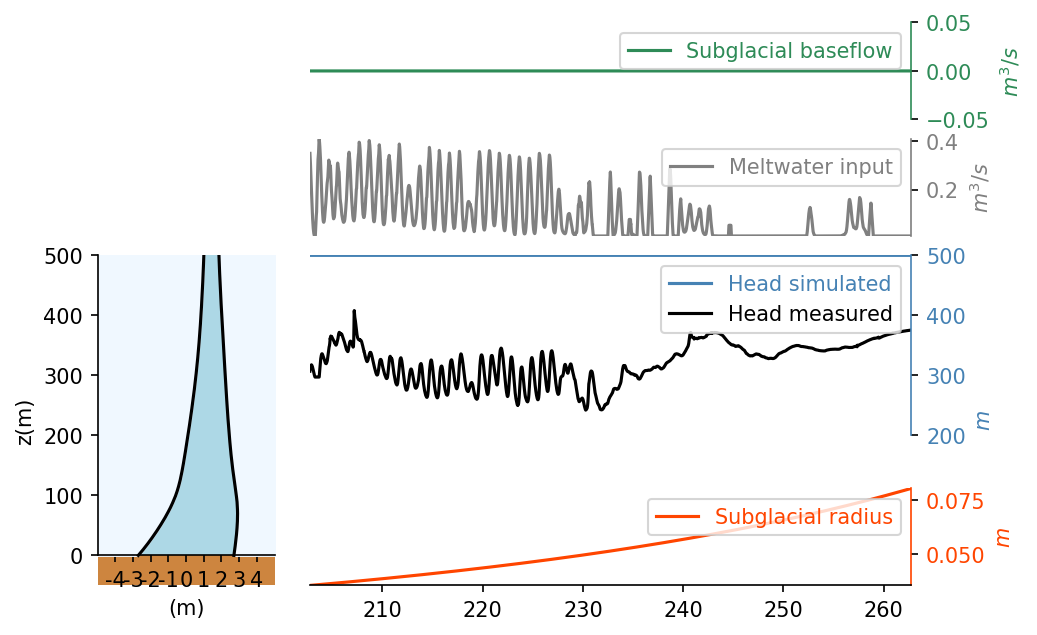

In [7]:
#INITIALIZE MODEL
jeme_brut = MoulinShape(  channel_length = channel_length,
                          temperature_profile = temperature_profile,                   
                          ice_thickness = jeme['ice_thickness'],
                          regional_surface_slope = regional_surface_slope,
                          initial_subglacial_area = 0.02)

days = 80
time = jeme['time'][int(20*secinday/300):int(days*secinday/300)]
meltwater = jeme['meltwater_input'][int(20*secinday/300):int(days*secinday/300)]
for t in time :
    jeme_brut.run1step(time,timestep,meltwater,
                 subglacial_baseflow = jeme['baseflow_one']*0,
                 creep=True,
                 elastic_deformation=True,
                 melt_below_head=True,
                 open_channel_melt=False,
                 potential_drop=True)
    
# PLOT MODEL OUTPUT    
idx = -2
fig = plt.figure(figsize=(7,6),dpi=150)
jeme_brut.plot_AGU_3(fig,idx,jeme['t_real'],jeme['h_real'])

#for idx in np.arange(1,jeme_brut.idx-1,6):
#    idx_plot +=1
#    moulin_goblet.plot_AGU_3(idx,t_real,h_real)
#    plt.savefig('/Users/cctrunz/Dropbox/RESEARCH/MOULIN-SHAPE-FIGURES-MOVIES/AGU2020_movies/Jeme_Brut_%d'%idx_plot)
#    plt.close()

ValueError: x and y must have same first dimension, but have shapes (17278,) and (25862,)

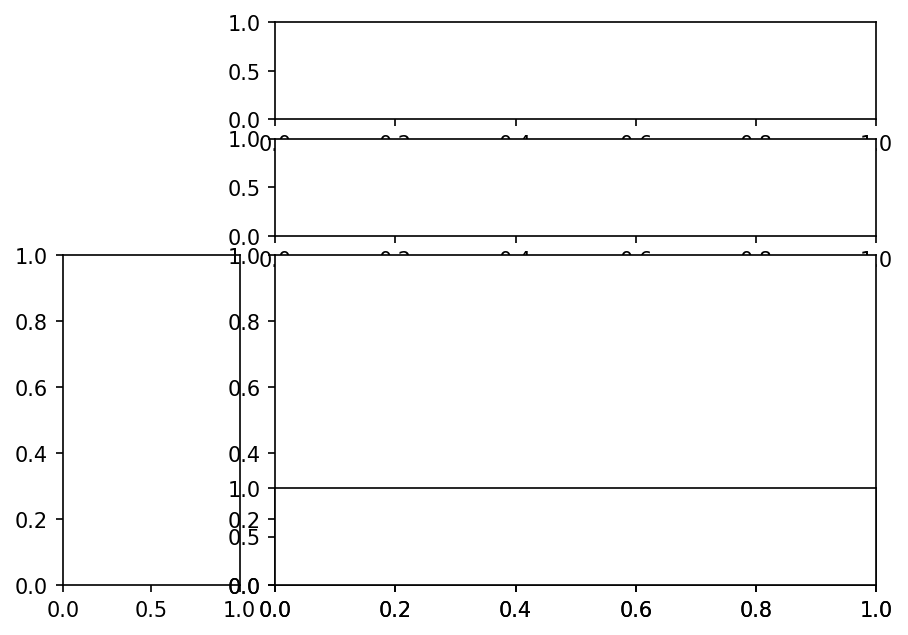

In [5]:
#INITIALIZE MODEL
pira_brut = MoulinShape(  channel_length = channel_length,
                          temperature_profile = temperature_profile,                   
                          ice_thickness = pira['ice_thickness'],
                          regional_surface_slope = regional_surface_slope,
                          initial_subglacial_area = 0.2)

days = 100
time_pira = pira['time']#[0:int(days*secinday/300)]
meltwater = pira['meltwater_input'][0:int(days*secinday/300)]
for t in time_pira :
    pira_brut.run1step(time,timestep,meltwater,
                 subglacial_baseflow = pira['baseflow_one']*0,
                 creep=True,
                 elastic_deformation=True,
                 melt_below_head=True,
                 open_channel_melt=False,
                 potential_drop=True)
    
# PLOT MODEL OUTPUT    
idx = -2
fig = plt.figure(figsize=(7,6),dpi=150)
pira_brut.plot_AGU_3(fig,idx,pira['t_real'],pira['h_real'])


In [ ]:
time_pira/secinday

# BRUT MELTWATER INPUT -- CONNECTED WITH MAIN SUBGLACIAL CHANNEL

In [ ]:
moulin_headL = MoulinShape( channel_length = channel_length,
                            temperature_profile = temperature_profile,                   
                            ice_thickness = jeme['ice_thickness'],
                            regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_headL.run1step(time,
                    timestep,
                    meltwater_input,
                    head_L = 290,
                    subglacial_baseflow = jeme['baseflow_one']*0
                    )
    
# PLOT MODEL OUTPUT    
idx = -2
moulin_headL.plot_AGU_3(idx,t_real,h_real)

# BRUT MELTWATER INPUT - with subglacial baseflow

In [ ]:
from PyMouSh import MoulinShape
moulin_baseflow = MoulinShape(  channel_length = channel_length,
                                temperature_profile = temperature_profile,                   
                                ice_thickness = ice_thickness,
                                regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_baseflow.run1step(time,
                    timestep,
                    meltwater_input,
                    subglacial_baseflow = 4)
    
# PLOT MODEL OUTPUT   
plt.figure()
idx = int(moulin_baseflow.idx/2)
moulin_baseflow.plot_AGU_3(idx,t_real,h_real)

fig, ax = plt.subplots()
moulin_baseflow.plot_head(ax)

fig, ax = plt.subplots()
moulin_baseflow.plot_radius(ax)
moulin_baseflow.plot_AGU_3(idx,t_real,h_real)

# BRUT METLWATER INPUT -- fixed shape similar to FOXX moulin

In [ ]:
#INITIALIZE MODEL
moulin_goblet = MoulinShape(z_elevations = (0,399,400,500),
                            moulin_radii = (1.5,1.5,5,5),                             
                            channel_length = channel_length,
                            temperature_profile = temperature_profile,                   
                            ice_thickness = ice_thickness,
                            regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_goblet.run1step(time,
                    timestep,
                    meltwater_input,
                    creep=False,
                    elastic_deformation=False,
                    melt_below_head=False,
                    open_channel_melt=False,
                    potential_drop=False,
                    ice_motion=False,
                    refreezing=False)
    
# PLOT MODEL OUTPUT    

moulin_goblet.plot_AGU_3(idx,t_real,h_real)
idx_plot = 0
#for idx in np.arange(1,moulin_goblet.idx-1,6):
#    idx_plot +=1
#    moulin_goblet.plot_AGU_3(idx,t_real,h_real)
#    plt.savefig('/Users/cctrunz/Dropbox/RESEARCH/MOULIN-SHAPE-FIGURES-MOVIES/AGU2020_movies/Jeme_BrutMeltwaterInput_FixedShapeFoxx_%d'%idx_plot)
#    plt.close()

In [ ]:
np.arange(1,moulin_goblet.idx-1,6)

# BRUT METLWATER INPUT -- fixed shape - just a cylinder

In [ ]:
#INITIALIZE MODEL
moulin_goblet = MoulinShape(moulin_radii = 5.,                  
                            channel_length = channel_length,
                            temperature_profile = temperature_profile,                   
                            ice_thickness = ice_thickness,
                            regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_goblet.run1step(time,
                    timestep,
                    meltwater_input,
                    creep=False,
                    elastic_deformation=False,
                    melt_below_head=False,
                    open_channel_melt=False,
                    potential_drop=False,
                    ice_motion=False,
                    refreezing=False)
    
# PLOT MODEL OUTPUT    
idx = -2
moulin_goblet.plot_AGU_3(idx,t_real,h_real)